# ***Importing Libraries***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ***Creating the Maze Environment***

In [ ]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        self.maze = maze
        self.maze_height = maze_layout.shape[0]
        self.maze_width = maze_layout.shape[1]
        self.start_position = start_position
        self.goal_position = goal_position

    def show_maze(self):
        plt.figure(figsize=(10,10))
        plt.imshow(self.maze, cmap='gray')
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)
        plt.xticks([]), plt.yticks([])
        plt.show()

# ***Create maze***

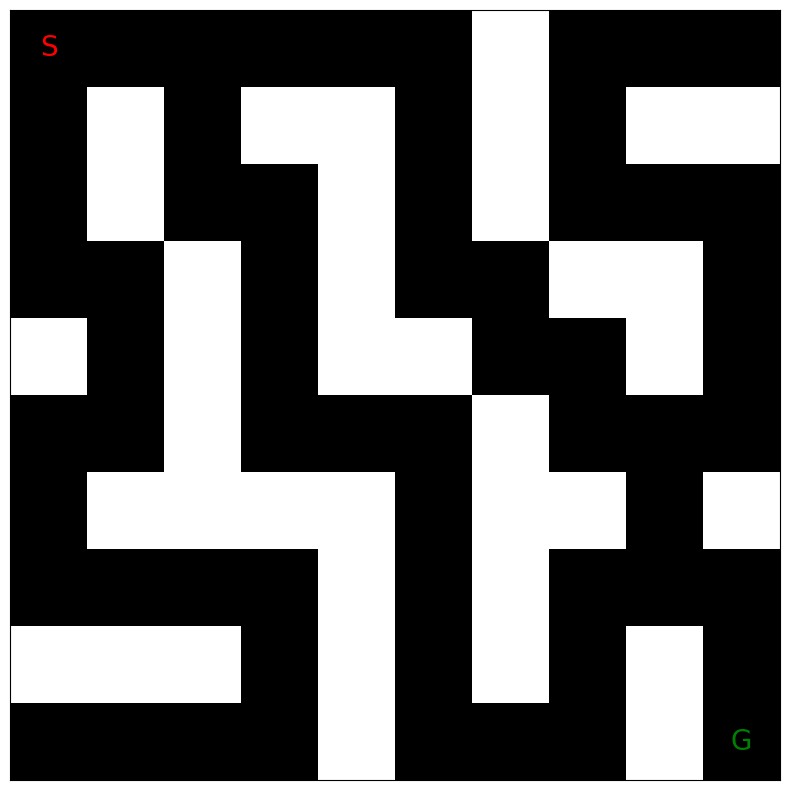

In [ ]:
maze_layout = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

maze = Maze(maze_layout, (0, 0), (9, 9))
maze.show_maze()

# ***AGENT ACTIONS***

In [ ]:
actions = [(-1, 0),(1, 0),(0, -1),(0, 1)]

# ***reward system***

In [ ]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

# *Q-Learning-agent*

In [ ]:
class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.q_table[next_state])
        current_q_value = self.q_table[state][action]
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)
        self.q_table[state][action] = new_q_value



# ***check if it arrived(finished)***

In [ ]:
def finish_episode(agent, maze, current_episode, train=True):
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Check if the agent reached the goal:
        elif next_state == (maze.goal_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(current_state)
            reward = step_penalty
        # Update the cumulative reward and step count for the episode
        episode_reward += reward
        episode_step += 1
        # Update the agent's Q-table if training is enabled
        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)
        # Move to the next state for the next iteration
        current_state = next_state
    # Return the cumulative episode reward, total number of steps, and the agent's path during the simulation
    return episode_reward, episode_step, path

# ***test & simulate the agent's movements in the maze***

Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (3, 1)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (3, 1)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (3, 1)-> (3, 0)-> (3, 1)-> (3, 0)-> (2, 0)-> (3, 0)-> (3, 1)-> (4, 1)-> (5, 1)-> (5, 0)-> (5, 1)-> (5, 0)-> (5, 1)-> (4, 1)-> (5, 1)-> (5, 0)-> (5, 1)-> (4, 1)-> (5, 1)-> (5, 0)-> (5, 1)-> (4, 1)-> (5, 1)-> (5, 0)-> (6, 0)-> (5, 0)-> (6, 0)-> (5, 0)-> (5, 1)-> (5, 0)-> (6, 0)-> (7, 0)-> (7, 1)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 3)-> (8, 3)-> (9, 3)-> (8, 3)-> (7, 3)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 3)-> (8, 3)-> (9, 3)-> (9, 2)-> (9, 1)-> (9, 2)-> (9, 3)-> (9, 2)-> (9, 1)-> (9, 2)-> (9, 1)-> (9, 2)-> (9, 3)-> (9, 2)-> (9, 1)-> (9, 2)-> (9, 3

<Figure size 640x480 with 0 Axes>

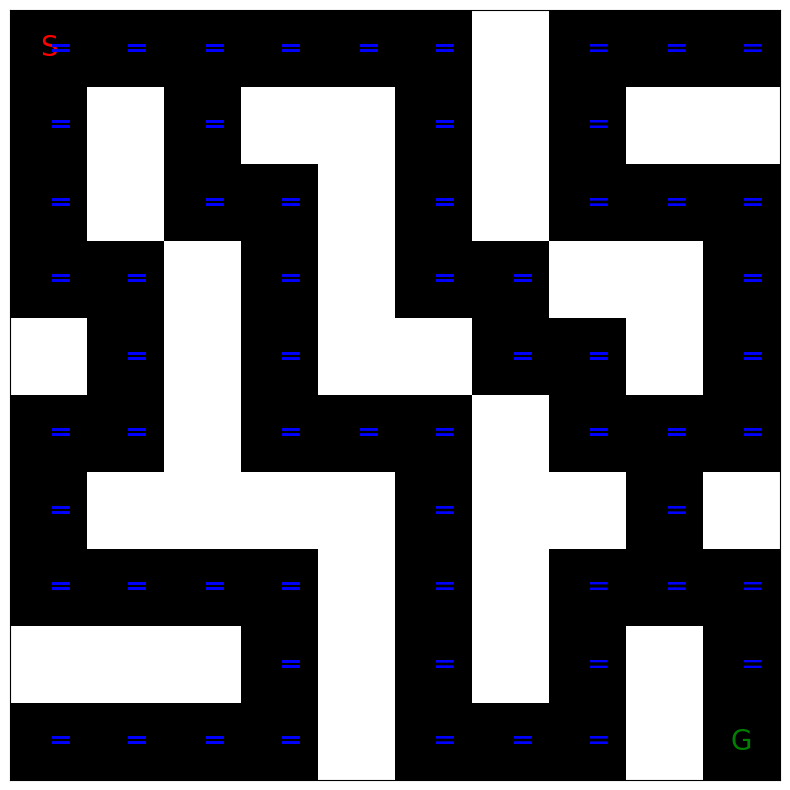

(3638, -19737)

In [ ]:
def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({col}, {row})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue '#' symbols
    for position in path:
        plt.text(position[0], position[1], "=", va='center', color='blue', fontsize=20)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

# ***train the agent***

In [ ]:
def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()



# ***Training the agent***

The average reward is: -409.82
The average steps is: 138.4


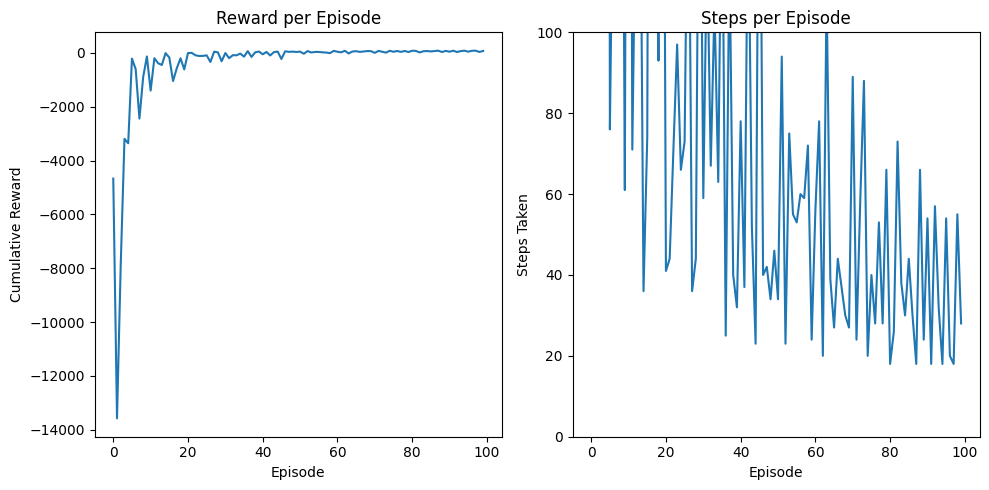

In [ ]:
train_agent(agent, maze, num_episodes=100)

# Testing the agent after ***training***

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0

<Figure size 640x480 with 0 Axes>

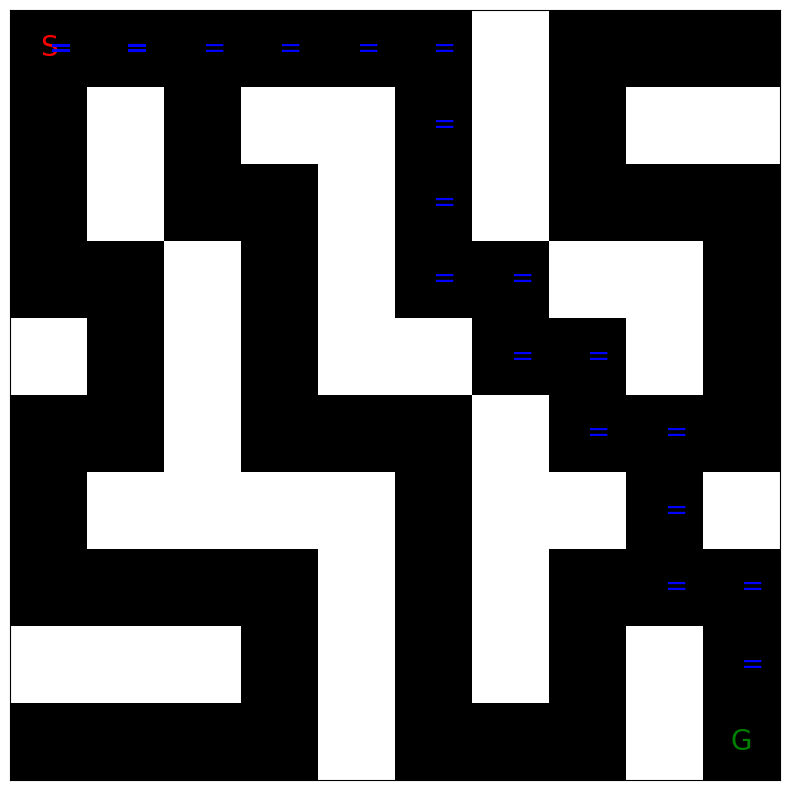

(202, -101)

In [ ]:
test_agent(agent, maze, num_episodes=100)

# ***Experimenting and Improving***

The average reward is: -733.72
The average steps is: 181.96


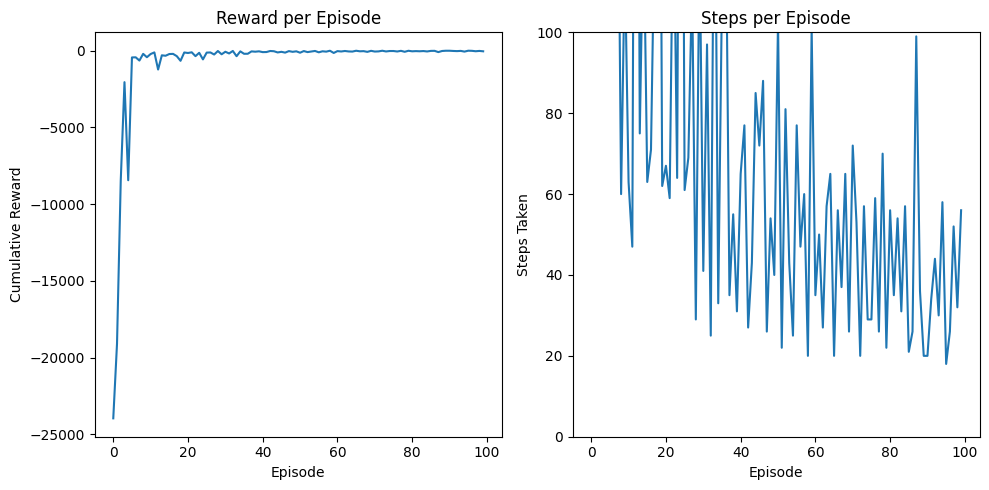

In [ ]:
goal_reward = 20
wall_penalty = -10
step_penalty = -1

agent = QLearningAgent(maze)
train_agent(agent, maze, num_episodes=100)

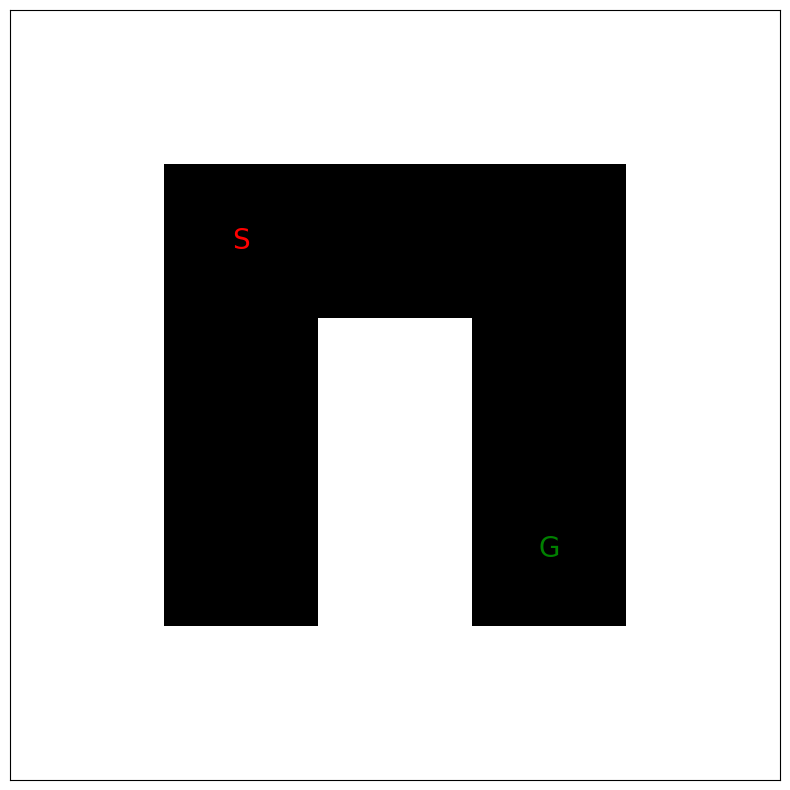

In [ ]:
# Create another maze layout
maze_layout_simple = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1]
])

# Set the starting and ending positions
start_x, start_y = 1, 1
goal_x, goal_y = 3, 3

# Create an instance of the simpler maze
maze_simple = Maze(maze_layout_simple, (start_x, start_y), (goal_x, goal_y))

# Visualize the simpler maze
maze_simple.show_maze()

Learned Path:
(1, 1)-> (1, 1)-> (2, 1)-> (1, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (1, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (1, 1)-> (1, 2)-> (1, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (3, 1)-> (2, 1)-> (1, 1)-> (2, 1)-> (1, 1)-> (1, 2)-> (1, 3)-> (2, 3)-> Goal!
Number of steps: 78
Total reward: -417


<Figure size 640x480 with 0 Axes>

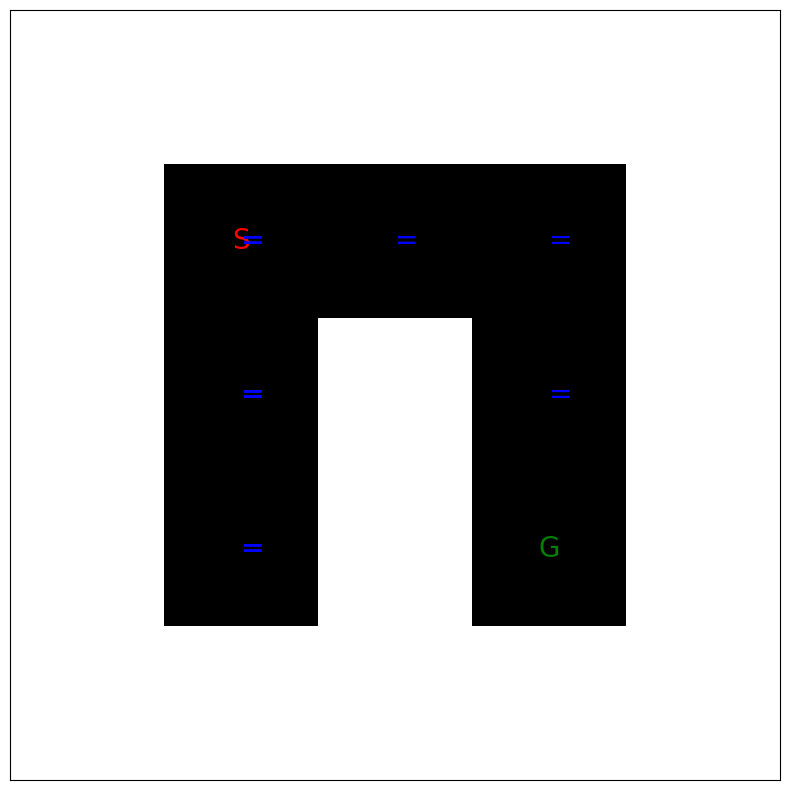

(78, -417)

In [ ]:
# Create the agent object
agent = QLearningAgent(maze_simple)
# Test the agent using the test_agent function
test_agent(agent,maze_simple)

The average reward is: 0.08
The average steps is: 6.97


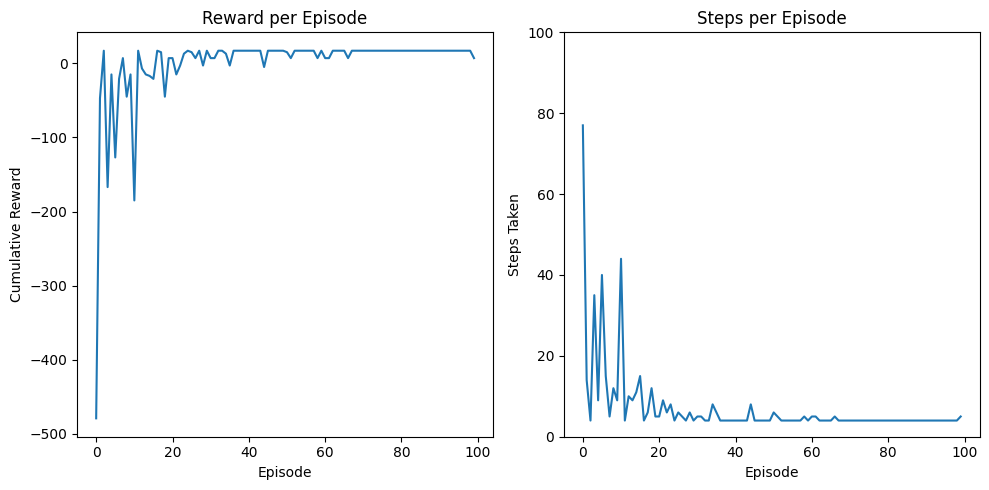

In [ ]:
# Training the agent
train_agent(agent, maze_simple, num_episodes=100)

Learned Path:
(1, 1)-> (1, 1)-> (1, 2)-> (1, 3)-> (1, 2)-> (1, 3)-> (2, 3)-> (1, 3)-> (2, 3)-> Goal!
Number of steps: 15
Total reward: -57


<Figure size 640x480 with 0 Axes>

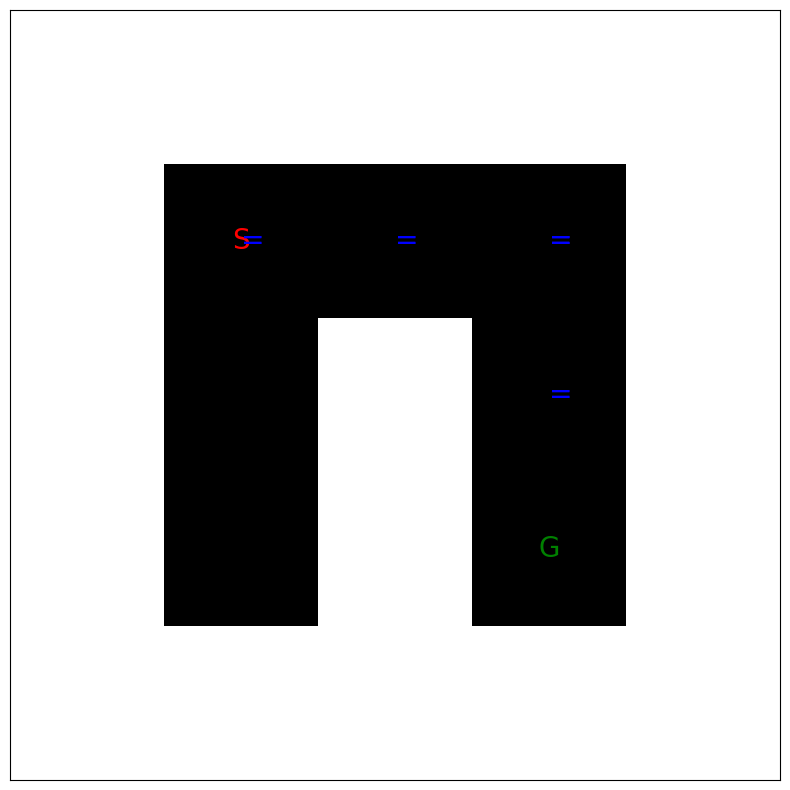

(15, -57)

In [ ]:
# Testing agent again after training, feel free to run multiple times
test_agent(agent, maze_simple)